(50, 50, 50)
Removed no burn in


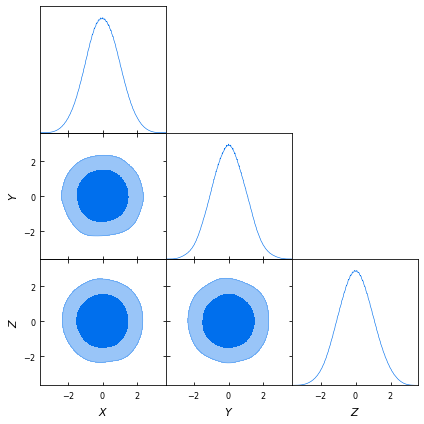

In [2]:
import numpy as np
import getdist
import getdist.plots as gdplt
import matplotlib.pyplot as plt
%matplotlib inline

# Example: Define a 3D probability grid (replace with your actual posterior)
Nx, Ny, Nz = 50, 50, 50  # Grid size
x_vals = np.linspace(-3, 3, Nx)
y_vals = np.linspace(-3, 3, Ny)
z_vals = np.linspace(-3, 3, Nz)

# Example posterior: A 3D Gaussian distribution
X, Y, Z = np.meshgrid(x_vals, y_vals, z_vals, indexing='ij')
p3d = np.exp(-0.5 * (X**2 + Y**2 + Z**2))  # Gaussian posterior

# Normalize the distribution
p3d /= np.sum(p3d)
print(p3d.shape)
# Convert 3D posterior into samples
flattened_probs = p3d.flatten()
grid_points = np.array(np.meshgrid(x_vals, y_vals, z_vals, indexing='ij')).reshape(3, -1).T

# Sample points from the distribution
num_samples = 10000  # Number of samples you want
sample_indices = np.random.choice(len(flattened_probs), size=num_samples, p=flattened_probs)
samples = grid_points[sample_indices]

# Convert to GetDist format
gd_samples = getdist.mcsamples.MCSamples(samples=samples, names=['x', 'y', 'z'], labels=['X', 'Y', 'Z'])

# Plot using GetDist
g = gdplt.get_subplot_plotter()
g.triangle_plot([gd_samples], filled=True)
plt.show()
